# Importer des bibliothèques

In [185]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Importer le jeu de données

In [186]:
dataset = pd.read_csv('titanic.csv')

In [187]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [188]:
dataset.shape

(887, 8)

## Vérifier les valeurs nulles

In [189]:
def display_missing_values(dataset):
  na_df = dataset.isna().sum().to_frame()
  na_df.columns = ['NA Count']
  return na_df
display_missing_values(dataset)

,NA Count
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


## nombre de valeurs uniques

In [190]:
unique_df = dataset.nunique().to_frame()
unique_df.columns = ['Unique Values Count']
unique_df

,Unique Values Count
Survived,2
Pclass,3
Name,887
Sex,2
Age,89
Siblings/Spouses Aboard,7
Parents/Children Aboard,7
Fare,248


## Supprimer les colonnes inutiles

In [191]:
dataset.drop(columns = ['Name'], axis = 1, inplace = True)

## Encoder les colonnes catégorielles

In [192]:
dataset = pd.get_dummies(data = dataset)

## Séparer le vecteur target et features

In [193]:
X = dataset.drop(columns = ['Survived'], axis = 1).values
y = dataset[['Survived']].values

## Préparer le jeu de données

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer le jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

# Standardiser le jeu de données
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.fit_transform(X)

# Regression logistique

### 1. Modèle


In [195]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [196]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [197]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 2. Fonction Coût 

In [198]:
def log_loss(y, A):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 3. Optimisation - Gradient et Descente de Gradient

In [199]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [200]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 4. Prédiction

In [201]:
def predict(X, W, b):
    A = modele(X, W, b)
    return A >= 0.5

### 5. Modèle final

In [202]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=1000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

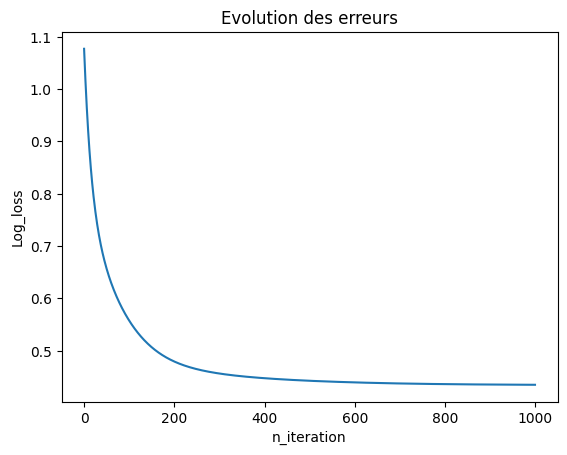

In [203]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [204]:
from sklearn.metrics import accuracy_score
y_train_pred = predict(X_train, W, b)
y_test_pred = predict(X_test, W, b)
print("Accuracy of training =", accuracy_score(y_train, y_train_pred))
print("Accuracy of test     =", accuracy_score(y_test, y_test_pred))

Accuracy of training = 0.8039492242595204
Accuracy of test     = 0.7808988764044944


In [205]:
# Dessiner la frontière de décision
x1 = np.linspace(0, 1, 200)
x2 = ( - W[0] * x1 - b) / W[1]

# Prédire la classe de nouveaux éléments: Pclass	| Age	| Siblings/Spouses Aboard |	Parents/Children Aboard |	Fare |	Sex_female |	Sex_male

new_1=np.array([1, 25, 0, 0, 100, 0, 1])
new_2=np.array([3, 70, 3, 2, 20, 0, 1])
new_3=np.array([3, 30, 0, 0, 40, 1, 0])

print(predict(scaler.transform([new_1]), W, b))
print(predict(scaler.transform([new_2]), W, b))
print(predict(scaler.transform([new_3]), W, b))


[[ True]]
[[False]]
[[ True]]


In [206]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)
print(cm)

[[475  70]
 [105 237]]


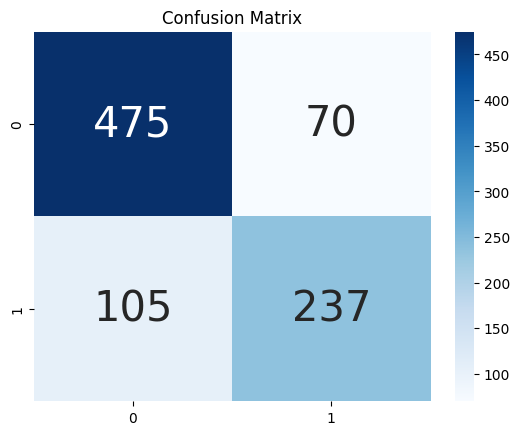

In [207]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Example d'une dataset séparable

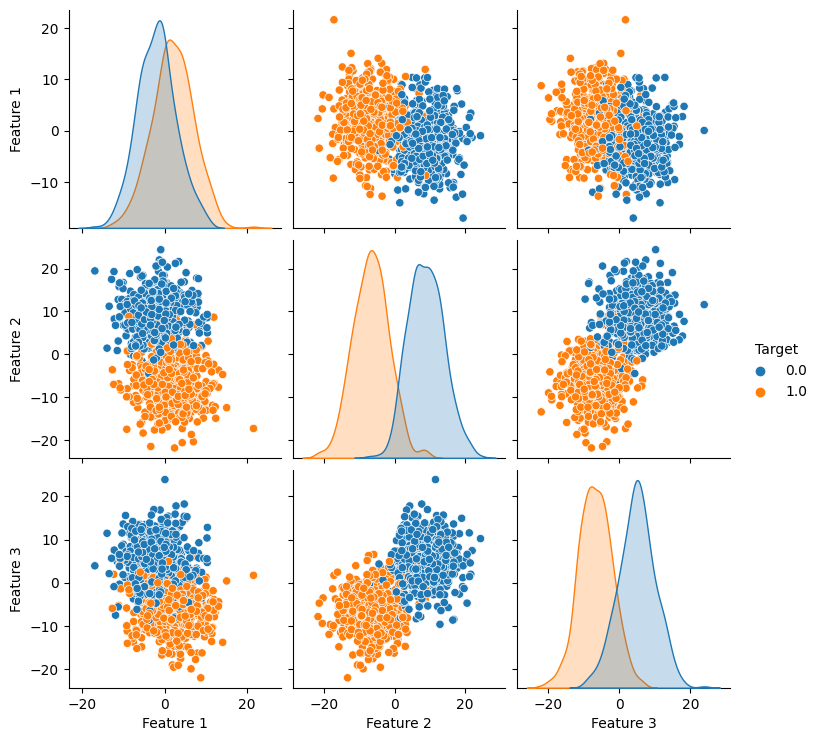

In [208]:
from sklearn.datasets import make_classification, make_blobs
import seaborn as sns

# Generate a separable dataset
# X, y = make_classification(n_samples=500, n_features=4,  n_clusters_per_class=1, random_state=42)
X, y = make_blobs(n_samples=1000, n_features=3, centers=2, cluster_std=5, random_state=42)
y = y.reshape(-1, 1)

# Create dataframe
dataset = pd.DataFrame(data = np.column_stack((X, y)), columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Target'])

# Plot the dataset
sns.pairplot(data = dataset, hue = 'Target')

# Entraîner le modèle de régression logistique

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
# Standardiser le jeu de données
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
y.shape

(1000, 1)

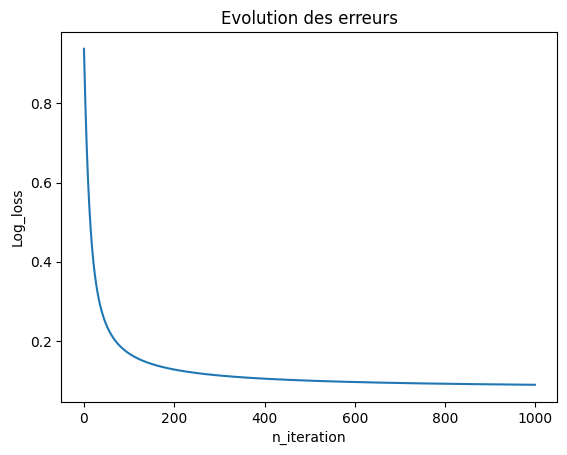

In [211]:
W, b = regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [212]:
from sklearn.metrics import accuracy_score
y_train_pred = predict(X_train, W, b)
y_test_pred = predict(X_test, W, b)
print("Accuracy of training =", accuracy_score(y_train, y_train_pred))
print("Accuracy of test     =", accuracy_score(y_test, y_test_pred))

Accuracy of training = 0.96875
Accuracy of test     = 0.96


[[ True]]
[[ True]]
[[False]]


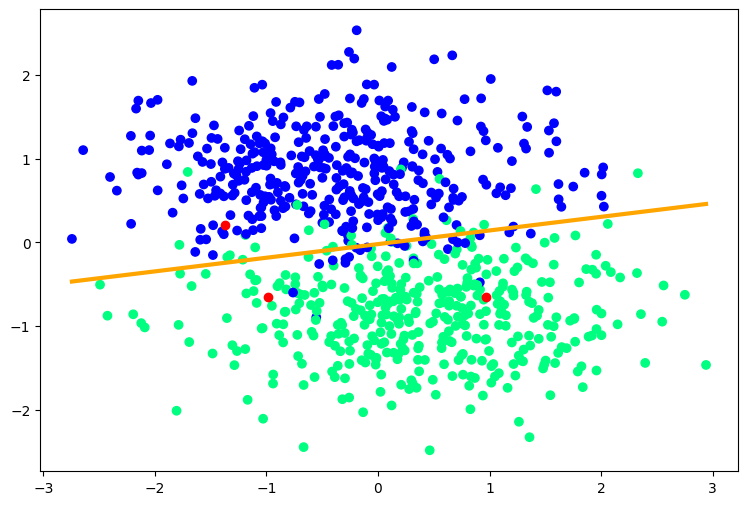

In [213]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments: 

new_1=np.array(scaler.transform([[-5, -5, 0]]))
new_2=np.array(scaler.transform([[5, -5, 3]]))
new_3=np.array(scaler.transform([[-7, 3, 0]]))
ax.scatter(new_1[:, 0], new_1[:, 1], c='r')
ax.scatter(new_2[:, 0], new_2[:, 1], c='r')
ax.scatter(new_3[:, 0], new_3[:, 1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [214]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)
print(cm)

[[489  11]
 [ 18 482]]


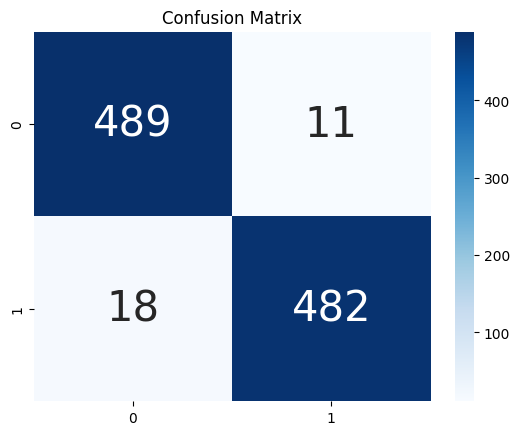

In [215]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()